In [1]:
import os
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

## Convert all images to .png format

In [ ]:
root_path = '/media/honghanh/STORED_DATA/DATA/2020-Fake-News-Detection-Task-master/FakeNews'
img_folder = 'images'
new_folder = 'new_images'

In [ ]:
img_list = os.listdir(os.path.join(root_path, img_folder))
path = os.path.join(root_path, new_folder)
if not os.path.exists(path):
    os.mkdir(os.path.join(root_path, new_folder))
for i in range(len(img_list)):
    img_path = os.path.join(root_path, img_folder, img_list[i])
    img = Image.open(img_path)
    #path = os.path.join(root_path, new_folder)
    img_name = img_list[i].split('.')[0]
    img.save(path + '/' + img_name + '.png')

In [ ]:
new_img_list = os.listdir(os.path.join(root_path, new_folder))
assert len(img_list) == len(new_img_list), "Error"

## Explore data

In [ ]:
files = ['5g_corona_conspiracy.json', 'non_conspiracy.json', 'other_conspiracy.json']

#### 5g_corona_conspiracy

In [ ]:
file_path = os.path.join(root_path, files[0])
with open(file_path) as f:
    data = json.load(f)
data[0].keys()

In [ ]:
data[0]

In [ ]:
val = random.choices(data, k=20)
for i in range(len(val)):
    text = data[i]['full_text']
    name = data[i]['id_str'] + '.png'
    path = os.path.join(root_path, new_folder, name)
    if os.path.exists(path):
        print(str(i) + ': #########################')
        print(text)
        img = Image.open(path)
        plt.imshow(img)
        plt.show()
    

### non_conspiracy

In [ ]:
file_path = os.path.join(root_path, files[1])
with open(file_path) as f:
    data = json.load(f)
val = random.choices(data, k=20)
for i in range(len(val)):
    text = data[i]['full_text']
    name = data[i]['id_str'] + '.png'
    path = os.path.join(root_path, new_folder, name)
    if os.path.exists(path):
        print(str(i) + ': #########################')
        print(text)
        img = Image.open(path)
        plt.imshow(img)
        plt.show()

### other_conspiracy

In [ ]:
file_path = os.path.join(root_path, files[2])
with open(file_path) as f:
    data = json.load(f)
val = random.choices(data, k=20)
for i in range(len(val)):
    text = data[i]['full_text']
    name = data[i]['id_str'] + '.png'
    path = os.path.join(root_path, new_folder, name)
    if os.path.exists(path):
        print(str(i) + ': #########################')
        print(text)
        img = Image.open(path)
        plt.imshow(img)
        plt.show()

## Data Analysis

In [2]:
from ekphrasis.classes.segmenter import Segmenter
root_path = './data'
train_filename = 'cleaned_train_train.csv'
val_filename = 'cleaned_train_val.csv'
train_df = pd.read_csv(os.path.join(root_path, train_filename))
val_df = pd.read_csv(os.path.join(root_path, val_filename))

In [3]:
val_df.head(5)

,ID,Text,Label,hashtag,Cleaned_Text,Unstop_Text
0,1258541410896146433,@PlanDemicCorony @Kompadontgiveup I did a vide...,1,[],i did a video on this a while ago also the ne...,video ago also new euros corona 5g towers yout...
1,1247573119579062277,Why doesn’t OFCOM want media to discuss allege...,1,['Orwellian'],why doesn’t ofcom want media to discuss allege...,’ ofcom want media discuss alleged links 5g co...
2,1246194340906614789,#AfricaNotAExperimentalLab. They decided to la...,1,"['AfricaNotAExperimentalLab', '5G', 'covid', '...",they decided to launch 5g in the midst of 19 ...,decided launch 5g midst epidemic w wont protes...
3,1247188565450272774,Some people say COVID-19 is from bars. Others ...,1,[],some people say covid19 is from bars others sa...,people say covid19 bars others say ’ 5g cell t...
4,1245873817010024448,people thinking 5g causing cancer/corona when ...,1,[],people thinking 5g causing cancercorona when i...,people thinking 5g causing cancercorona ’ noni...


In [4]:
print(train_df['Unstop_Text'][1587], '#'*10, train_df['Label'][4043])
print('#'*50)
print(train_df['Text'][1587])

message kcctech leadership covid19 coronavirus global epidemic amp emergency unicaciones 5g coronavirus munications ########## 3
##################################################
A Message from KCCTech Leadership during the COVID-19 (CoronaVirus) Global Epidemic &amp; Emergency...
#kcctech #4g #3g #telecom #telecomunicaciones #verizon #5g #Pandemic #Epidemic #coronavirus #Covid19 #Telecommunications #Carriers #services https://t.co/4DeH3Jo5Hq


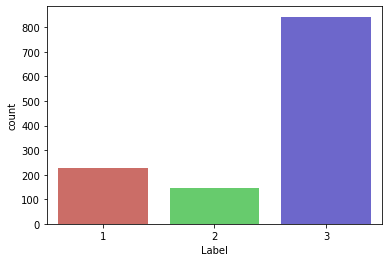

In [5]:
sns.countplot(x='Label', data=val_df, palette='hls')

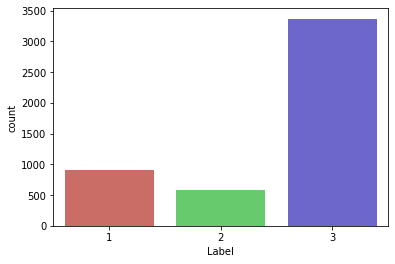

In [6]:
sns.countplot(x='Label', data=train_df, palette='hls')

## Count the frequency of words

### Train dataset

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
def count_frequence(data):
    counter = CountVectorizer()
    train_counter = counter.fit_transform(data.values)
    word_list = counter.get_feature_names()
    count_list = train_counter.toarray().sum(axis=0)
    train_count_dict = dict(zip(word_list, count_list))
    return train_counter, {key: val for key, val in sorted(train_count_dict.items(), key=lambda item: item[1], reverse=True)}

In [9]:
label1_cvec, train_label1_counter = count_frequence(train_df[train_df['Label'] == 1]['Unstop_Text'])
top_10 = list(train_label1_counter.items())[:10]
top_10

[('5g', 1183),
 ('coronavirus', 363),
 ('virus', 218),
 ('covid19', 189),
 ('people', 178),
 ('corona', 151),
 ('wuhan', 140),
 ('amp', 131),
 ('towers', 107),
 ('world', 105)]

In [10]:
label2_cvec, train_label2_counter = count_frequence(train_df[train_df['Label'] == 2]['Unstop_Text'])
top_10 = list(train_label2_counter.items())[:10]
top_10

[('5g', 479),
 ('coronavirus', 143),
 ('amp', 98),
 ('virus', 96),
 ('people', 94),
 ('corona', 77),
 ('us', 70),
 ('covid19', 65),
 ('world', 64),
 ('china', 49)]

In [11]:
label3_cvec, train_label3_counter = count_frequence(train_df[train_df['Label'] == 3]['Unstop_Text'])
top_10 = list(train_label3_counter.items())[:10]
top_10

[('5g', 2272),
 ('coronavirus', 1193),
 ('people', 699),
 ('conspiracy', 494),
 ('covid19', 474),
 ('amp', 347),
 ('virus', 329),
 ('corona', 267),
 ('think', 248),
 ('us', 248)]

## Count part of speech

In [13]:
from nltk.corpus import brown
from collections import Counter
import nltk
#nltk.download('averaged_perceptron_tagger')

In [14]:
def count_SOP(data):
    counts = Counter()
    for sentence in data:
        tokens = nltk.word_tokenize(sentence)
        tags = nltk.pos_tag(tokens)
        counts.update(tag for word, tag in tags)
    return dict(counts)

In [15]:
def find_common_SOP(adict):
    new_dict = {
        'Noun': 0,
        'Verb': 0,
        'ADJ': 0,
        'ADV': 0,
        'PREP': 0,
    }
    for k, v in adict.items():
        if k in ['NN', 'NNS', 'NNP', 'NNPS']:
            new_dict['Noun'] += v
        elif k in ['TO', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']:
            new_dict['Verb'] += v
        elif k in ['JJ', 'JJR', 'JJS']:
            new_dict['ADJ'] += v
        elif k in ['RB', 'RBR', 'RBS']:
            new_dict['ADV'] += v
        elif k in ['IN', 'CC']:
            new_dict['PREP'] += v
    return new_dict

In [16]:
def draw_sop_count(adict):
    keys = adict.keys()
    values = adict.values()
    plt.bar(keys, values)
    plt.show()

In [17]:
train_label1_sop = find_common_SOP(count_SOP(train_df[train_df['Label'] == 1]['Unstop_Text']))
train_label2_sop = find_common_SOP(count_SOP(train_df[train_df['Label'] == 2]['Unstop_Text']))
train_label3_sop = find_common_SOP(count_SOP(train_df[train_df['Label'] == 3]['Unstop_Text']))

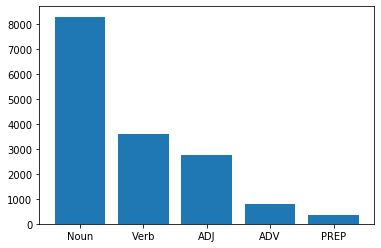

In [18]:
draw_sop_count(train_label1_sop)

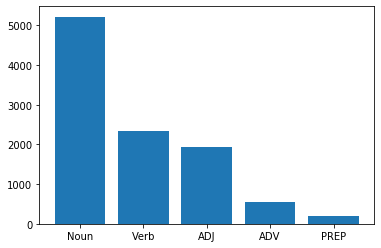

In [19]:
draw_sop_count(train_label2_sop)

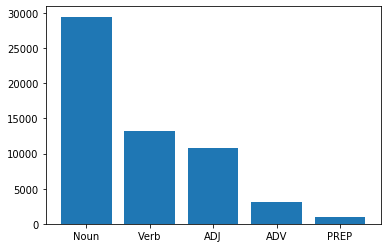

In [20]:
draw_sop_count(train_label3_sop)

In [21]:
print(label1_cvec.shape)
print(label2_cvec.shape)
print(label3_cvec.shape)

(915, 4436)
(575, 3965)
(3368, 11473)


# TF-IDF

In [22]:
#train_cvec, counter = count_frequence(train_df['Unstop_Text'])

In [33]:
df = train_df
df = df.append(val_df)
df.shape

(6074, 6)

In [35]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), use_idf=True, smooth_idf=True)
tfidf_vectors = tfidf_vectorizer.fit_transform(df['Unstop_Text'])
#val_tfidf_vectors = tfidf_vectorizer.fit_transform(val_df['Unstop_Text'])

In [40]:
train_features, test_features = tfidf_vectors[:4858,], tfidf_vectors[4859:,]
train_labels, test_labels = df['Label'][:4858], df['Label'][4859:]

In [37]:
from sklearn import linear_model

In [41]:
logistic = linear_model.LogisticRegression()
logistic_net = logistic.fit(train_features, train_labels)

In [42]:
logistic_net.score(test_features, test_labels)

0.7366255144032922

In [50]:
pred = logistic_net.predict(test_features)


In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
mnb = MultinomialNB()
mnb.fit(train_features, train_labels)
mnb.score(test_features, test_labels)

0.6995884773662552

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(train_features,train_labels)
clf.score(test_features,test_labels)

0.6938271604938272